# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_study_df = pd.DataFrame(mouse_study)
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study_df[mouse_study_df.duplicated()]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df.loc[mouse_study_df["Mouse ID"]=="g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study_df[mouse_study_df["Mouse ID"]!="g989"]
clean_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Tumor_mean = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Tumor_median = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Tumor_var = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Tumor_std = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Tumor_sem = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
durg_summary_df = pd.DataFrame({"Mean Tumor Volume": Tumor_mean,
                             "Median Tumor Volume": Tumor_median,
                             "Tumor Volume Variance": Tumor_var,
                             "Tumor Volume Sta. Dev.": Tumor_std,
                             "Tumor Volume Std.Err.": Tumor_sem})

durg_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Sta. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary2 = clean_mouse_study[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])
drug_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
drug_counts = clean_mouse_study["Drug Regimen"].value_counts()

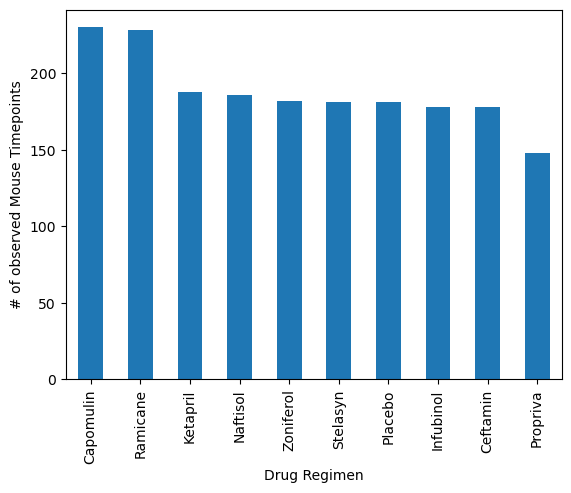

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts.plot.bar(x = "Drug Regimen", y = "Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

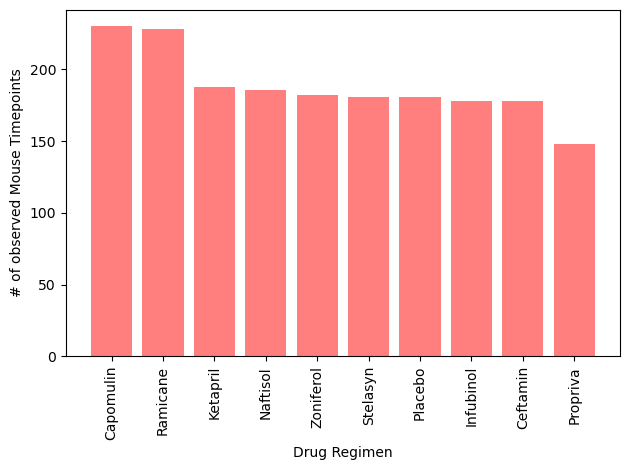

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_counts))
tick_location = [value for value in x_axis]

plt.bar(x_axis, drug_counts, color="r", alpha=.5, align="center")
plt.xticks(tick_location, list(drug_counts.index), rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.tight_layout()
plt.show

<class 'pandas.core.series.Series'>
Index: 2 entries, Male to Female
Series name: Sex
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 32.0+ bytes


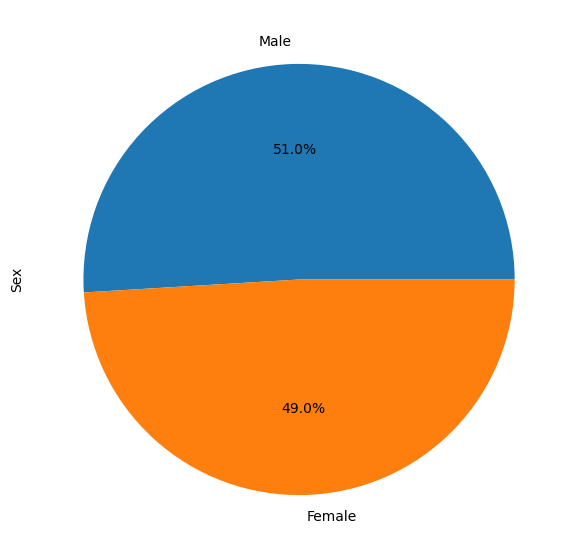

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_mouse_study["Sex"].value_counts()
gender_counts.info()

gender_counts.plot.pie(y="Sex", autopct= "%1.1f%%", figsize=(7, 7))
plt.show()

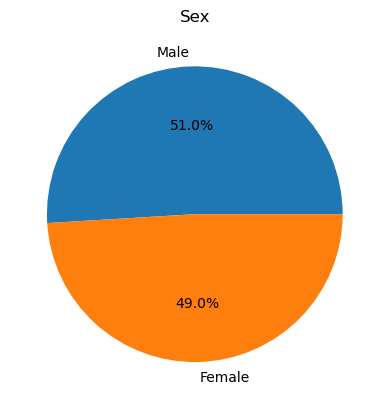

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_counts.index)

plt.pie(gender_counts, labels=genders, autopct="%1.1f%%", shadow=False, startangle=0)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_maxtimepoint_df = pd.DataFrame(clean_mouse_study.groupby("Mouse ID")["Timepoint"].max().reset_index())
mouse_maxtimepoint_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [15]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_final_Tp =  pd.merge(clean_mouse_study, mouse_maxtimepoint_df, on="Mouse ID")
mouse_final_Tp

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
for drug in drug_list:
    drugs = mouse_final_Tp.loc[mouse_final_Tp["Drug Regimen"]==drug]
    final_tp = drugs.loc[drugs["Timepoint_x"]==drugs["Timepoint_y"]]
    final_volume = final_tp["Tumor Volume (mm3)"]
    tumor_volume.append(final_volume)    
    
    # Determine outliers using upper and lower bounds
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq).round(2)
    print(f"IQR for {drug}: {iqr}")

    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    print(f"Lower bound value for {drug}: {lower_bound}")
    print(f"Upper bound value for {drug}: {upper_bound}")
    
    outliers = (final_volume.loc[(final_tp["Tumor Volume (mm3)"]>=upper_bound)|(final_tp["Tumor Volume (mm3)"]<=lower_bound)]).count()
    print(f"Number of outliers in {drug}: {outliers}")

IQR for Capomulin: 7.78
Lower bound value for Capomulin: 20.71
Upper bound value for Capomulin: 51.83
Number of outliers in Capomulin: 0
IQR for Ramicane: 9.1
Lower bound value for Ramicane: 17.91
Upper bound value for Ramicane: 54.31
Number of outliers in Ramicane: 0
IQR for Infubinol: 11.48
Lower bound value for Infubinol: 36.83
Upper bound value for Infubinol: 82.75
Number of outliers in Infubinol: 1
IQR for Ceftamin: 15.58
Lower bound value for Ceftamin: 25.35
Upper bound value for Ceftamin: 87.67
Number of outliers in Ceftamin: 0


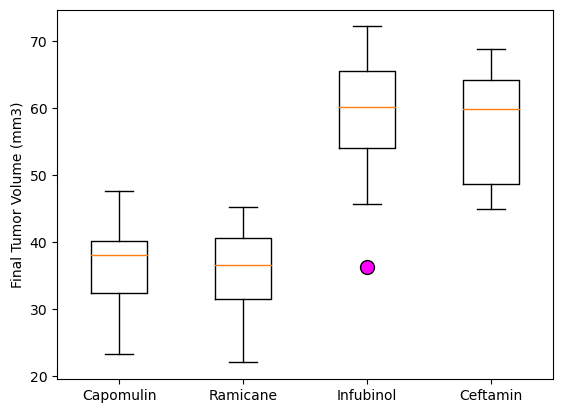

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
plt.xticks([1,2,3,4], drug_list, rotation="horizontal")
plt.show()

## Line and Scatter Plots

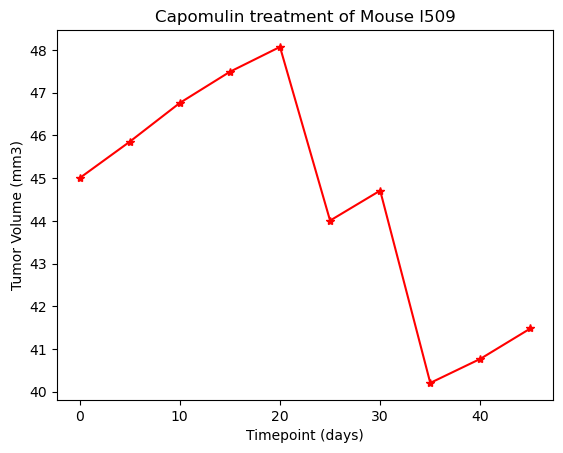

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_mouse_study.loc[mouse_study_df["Mouse ID"]=="l509"]
mouse_l509
x=mouse_l509["Timepoint"]
y=mouse_l509["Tumor Volume (mm3)"]
plt.plot(x,y, marker='*', color='red')
plt.title("Capomulin treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

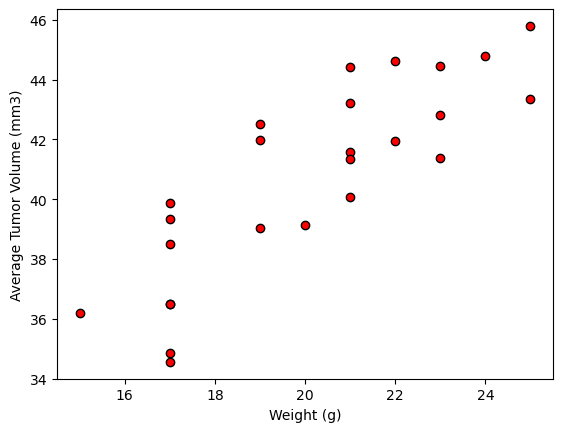

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_regimen = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]

# Make new dataframe for Capomulin to find average tumor volume
avg_tum_vol = pd.DataFrame(Capomulin_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
tum_vol_merge = pd.merge(Capomulin_regimen, avg_tum_vol, on="Mouse ID")
final_weight_tum_vol = tum_vol_merge[["Weight (g)", "Tumor Volume (mm3)_y"]].drop_duplicates()

x = final_weight_tum_vol["Weight (g)"]
y = final_weight_tum_vol["Tumor Volume (mm3)_y"]

plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

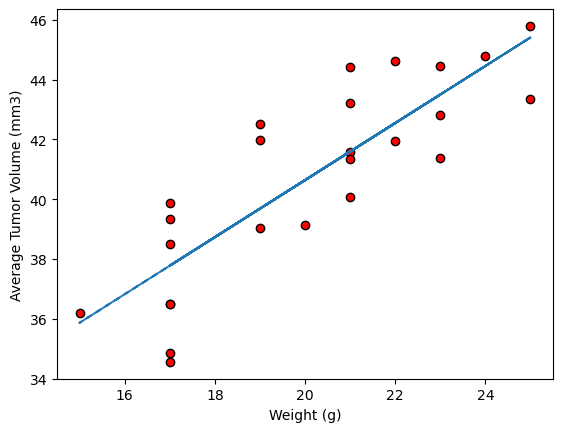

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

slope, int, r, p, std_err = st.linregress(x, y)
fit = slope * x + int

plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(x,fit,"--")

plt.show()